In [1]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd

# Sample data for product preferences by age group
data = {
    'Age Group': ['Young', 'Young', 'Old', 'Old'],
    'Product': ['Product A', 'Product B', 'Product A', 'Product B'],
    'Count': [40, 60, 50, 50]  # Number of customers in each group
}
df = pd.DataFrame(data)
df

,Age Group,Product,Count
0,Young,Product A,40
1,Young,Product B,60
2,Old,Product A,50
3,Old,Product B,50


In [14]:
# contigency table

pd.pivot_table(data=df, 
               index="Age Group",
               columns="Product",
               values="Count",
               aggfunc=["sum", 'count','std', 'mean', 'max'])

sum               count                mean            \
Product   Product A Product B Product A Product B Product A Product B   
Age Group                                                               
Old              50        50         1         1        50        50   
Young            40        60         1         1        40        60   

                max            
Product   Product A Product B  
Age Group                      
Old              50        50  
Young            40        60

In [16]:
data = {
    'Age Group': ['Young', 'Young', 'Young', 'Young', 'Young', 'Young',
                  'Old', 'Old', 'Old', 'Old', 'Old', 'Old',
                  'Middle-aged', 'Middle-aged', 'Middle-aged', 'Middle-aged', 'Middle-aged', 'Middle-aged',
                  'Senior', 'Senior', 'Senior', 'Senior', 'Senior', 'Senior',
                  'Retired', 'Retired', 'Retired', 'Retired', 'Retired', 'Retired'],
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F',
                'Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F',
                'Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F',
                'Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F',
                'Product A', 'Product B', 'Product C', 'Product D', 'Product E', 'Product F'],
    'Count': [85, 75, 50, 30, 40, 20,  # Young
              70, 60, 45, 35, 50, 40,  # Old
              60, 50, 70, 55, 45, 65,  # Middle-aged
              40, 55, 60, 45, 50, 40,  # Senior
              30, 45, 50, 40, 35, 50]  # Retired
}

df= pd.DataFrame(data)
df

,Age Group,Product,Count
0,Young,Product A,85
1,Young,Product B,75
2,Young,Product C,50
3,Young,Product D,30
4,Young,Product E,40
5,Young,Product F,20
6,Old,Product A,70
7,Old,Product B,60
8,Old,Product C,45
9,Old,Product D,35


In [17]:
df.columns

Index(['Age Group', 'Product', 'Count'], dtype='object')

In [26]:
# Create a contingency table to show the total count of customers who prefer each product across all age groups.
cont = pd.pivot_table(data=df,
               index="Age Group",
               columns="Product",
               values="Count",
               aggfunc='sum')

cont

Product,Product A,Product B,Product C,Product D,Product E,Product F
Age Group,,,,,,
Middle-aged,60,50,70,55,45,65
Old,70,60,45,35,50,40
Retired,30,45,50,40,35,50
Senior,40,55,60,45,50,40
Young,85,75,50,30,40,20


# Find the total count of customers for each age group

In [22]:
# Find the total count of customers for each age group
pd.pivot_table(data=df,
               index="Age Group",
               values="Count",
               aggfunc='sum')


,Count
Age Group,
Middle-aged,345
Old,300
Retired,250
Senior,290
Young,300


In [25]:
df.groupby("Age Group")['Count'].sum()

Age Group
Middle-aged    345
Old            300
Retired        250
Senior         290
Young          300
Name: Count, dtype: int64

#3. Which product is the most popular among the 'Middle-aged' age group?

In [34]:
cont = pd.pivot_table(data=df,
               index="Age Group",
               columns="Product",
               values="Count",
               aggfunc='sum')
cont

cont.loc['Middle-aged'].idxmax()

'Product C'

#4. What is the distribution of product preferences across the 'Retired' age group?

Product
Product A    30
Product B    45
Product C    50
Product D    40
Product E    35
Product F    50
Name: Retired, dtype: int64

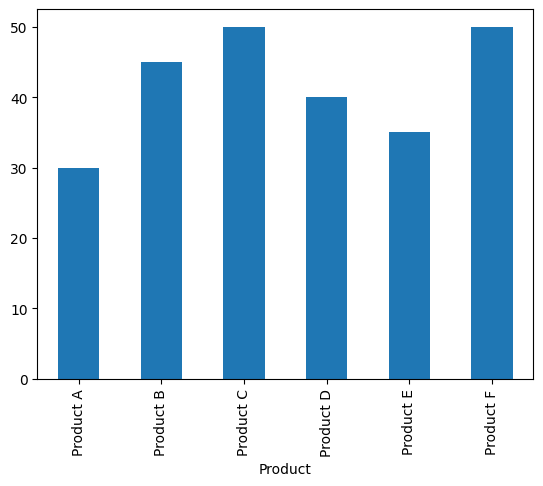

In [38]:
cont.loc['Retired'].plot(kind="bar")
cont.loc['Retired']

In [42]:
#percentage dist
(cont.loc['Retired']/ cont.loc['Retired'].sum())*100

Product
Product A    12.0
Product B    18.0
Product C    20.0
Product D    16.0
Product E    14.0
Product F    20.0
Name: Retired, dtype: float64

#5. Find the count of customers who preferred 'Product A' across all age groups.

In [47]:
print(cont)
print()
print()
print(cont['Product A'].sum())

Product      Product A  Product B  Product C  Product D  Product E  Product F
Age Group                                                                    
Middle-aged         60         50         70         55         45         65
Old                 70         60         45         35         50         40
Retired             30         45         50         40         35         50
Senior              40         55         60         45         50         40
Young               85         75         50         30         40         20


285


#6. Calculate the average count of customers per age group for each product.

In [49]:
cont.mean(axis=0)

Product
Product A    57.0
Product B    57.0
Product C    55.0
Product D    41.0
Product E    44.0
Product F    43.0
dtype: float64

#7. What percentage of the total customers in the dataset preferred 'Product E'?

In [56]:
print(cont)
total_customers = cont.sum().sum()
prod_e_cust_sum = cont['Product E'].sum()

# percentage of cust prefered prod e
print ((prod_e_cust_sum/total_customers)*100)

Product      Product A  Product B  Product C  Product D  Product E  Product F
Age Group                                                                    
Middle-aged         60         50         70         55         45         65
Old                 70         60         45         35         50         40
Retired             30         45         50         40         35         50
Senior              40         55         60         45         50         40
Young               85         75         50         30         40         20
14.814814814814813


#8. Create a pivot table that shows the percentage distribution of product preferences for each age group.

In [63]:
percentage_distribution = cont.div(cont.sum(axis=1), axis=0) * 100
print(percentage_distribution)

Product      Product A  Product B  Product C  Product D  Product E  Product F
Age Group                                                                    
Middle-aged  17.391304  14.492754  20.289855  15.942029  13.043478  18.840580
Old          23.333333  20.000000  15.000000  11.666667  16.666667  13.333333
Retired      12.000000  18.000000  20.000000  16.000000  14.000000  20.000000
Senior       13.793103  18.965517  20.689655  15.517241  17.241379  13.793103
Young        28.333333  25.000000  16.666667  10.000000  13.333333   6.666667


#10. Which product has the most balanced customer distribution across all age groups (i.e., the product with the smallest variation in preferences among the age groups)?

In [62]:
product_variance = cont.var(axis=0)
print(product_variance)
most_balanced_product = product_variance.idxmin()
print( "\nAnswer : ", most_balanced_product)

Product
Product A    495.0
Product B    132.5
Product C    100.0
Product D     92.5
Product E     42.5
Product F    270.0
dtype: float64

Answer :  Product E


# Real-world Scenario Questions:
#16. Do customers in the 'Senior' age group show a preference for certain products more than others?

In [64]:
cont

Product,Product A,Product B,Product C,Product D,Product E,Product F
Age Group,,,,,,
Middle-aged,60,50,70,55,45,65
Old,70,60,45,35,50,40
Retired,30,45,50,40,35,50
Senior,40,55,60,45,50,40
Young,85,75,50,30,40,20


In [66]:
cont.loc['Senior'].max()

60

#17. Which product seems to be the most consistently preferred across all age groups?

In [71]:
cont.var(axis=0).sort_values() # col level
#most consitent is : product E

Product
Product E     42.5
Product D     92.5
Product C    100.0
Product B    132.5
Product F    270.0
Product A    495.0
dtype: float64

#18. What insights can you gather about the preferences of 'Young' customers compared to 'Old' customers?

In [73]:
cont.loc[['Young', 'Old']]

Product,Product A,Product B,Product C,Product D,Product E,Product F
Age Group,,,,,,
Young,85,75,50,30,40,20
Old,70,60,45,35,50,40


In [82]:
cont.loc[['Young', 'Old']].diff(axis=0) 
# Young preffred mostly: Product A	Product B compared to o;d

Product,Product A,Product B,Product C,Product D,Product E,Product F
Age Group,,,,,,
Young,NaN,NaN,NaN,NaN,NaN,NaN
Old,-15.0,-15.0,-5.0,5.0,10.0,20.0


#If the company wants to increase the preference for Product C in the 'Retired' age group, what marketing strategy would you suggest?


 targeted marketing campaign focusing on the Retired age group should emphasize the benefits of 'Product C', particularly around comfort or ease of use, as 'Product C' already has a high preference in that group.

# .div() function in Pandas is used to divide the elements of a DataFrame by another DataFrame, Series, or scalar value. In the context of creating a percentage distribution of product preferences across different age groups, .div() is used to divide the counts of each product by the total count of customers in each respective age group.

Here’s how .div() works in this specific case:

In [78]:
# Calculate the total customers per age group
total_per_age_group = cont.sum(axis=1)
print("total_per_age_group")
print(total_per_age_group)

print("\ncont")
print(cont)

# Divide each product count by the total count for each age group
percentage_distribution = cont.div(total_per_age_group, axis=0) * 100

# Display the result
print("\n",percentage_distribution)


total_per_age_group
Age Group
Middle-aged    345
Old            300
Retired        250
Senior         290
Young          300
dtype: int64

cont
Product      Product A  Product B  Product C  Product D  Product E  Product F
Age Group                                                                    
Middle-aged         60         50         70         55         45         65
Old                 70         60         45         35         50         40
Retired             30         45         50         40         35         50
Senior              40         55         60         45         50         40
Young               85         75         50         30         40         20

 Product      Product A  Product B  Product C  Product D  Product E  Product F
Age Group                                                                    
Middle-aged  17.391304  14.492754  20.289855  15.942029  13.043478  18.840580
Old          23.333333  20.000000  15.000000  11.666667  16.666667  13.333

In [79]:
60/345

0.17391304347826086

In [80]:
# Extract the 'Senior' age group data from the contingency table
senior_preferences = cont.loc['Senior']

# Sort the preferences to see which products are most preferred
sorted_senior_preferences = senior_preferences.sort_values(ascending=False)

# Display the sorted preferences
print("Sorted Product Preferences for the Senior Age Group:")
print(sorted_senior_preferences)

# Optionally, calculate the percentage distribution of product preferences in the Senior group
senior_percentage = (senior_preferences / senior_preferences.sum()) * 100
print("\nPercentage Distribution of Product Preferences for the Senior Age Group:")
print(senior_percentage)


Sorted Product Preferences for the Senior Age Group:
Product
Product C    60
Product B    55
Product E    50
Product D    45
Product A    40
Product F    40
Name: Senior, dtype: int64

Percentage Distribution of Product Preferences for the Senior Age Group:
Product
Product A    13.793103
Product B    18.965517
Product C    20.689655
Product D    15.517241
Product E    17.241379
Product F    13.793103
Name: Senior, dtype: float64


In [81]:
# Extract the preferences for 'Young' and 'Old' age groups from the contingency table
young_preferences = cont.loc['Young']
old_preferences = cont.loc['Old']

# Calculate the difference in preferences between Young and Old age groups
preference_difference = young_preferences - old_preferences

# Sort the difference to see the largest differences
sorted_difference = preference_difference.sort_values(ascending=False)

# Display the sorted difference
print("Difference in Product Preferences between Young and Old Age Groups:")
print(sorted_difference)

# Optionally, calculate the percentage distribution for both groups
young_percentage = (young_preferences / young_preferences.sum()) * 100
old_percentage = (old_preferences / old_preferences.sum()) * 100

# Display the percentage distributions for comparison
print("\nPercentage Distribution for Young Age Group:")
print(young_percentage)

print("\nPercentage Distribution for Old Age Group:")
print(old_percentage)


Difference in Product Preferences between Young and Old Age Groups:
Product
Product A    15
Product B    15
Product C     5
Product D    -5
Product E   -10
Product F   -20
dtype: int64

Percentage Distribution for Young Age Group:
Product
Product A    28.333333
Product B    25.000000
Product C    16.666667
Product D    10.000000
Product E    13.333333
Product F     6.666667
Name: Young, dtype: float64

Percentage Distribution for Old Age Group:
Product
Product A    23.333333
Product B    20.000000
Product C    15.000000
Product D    11.666667
Product E    16.666667
Product F    13.333333
Name: Old, dtype: float64


Young customers prefer products like Product A and Product B significantly more than the Old customers.

The Old customers show a stronger preference for Product E and Product F.